#NutriScore

## Neural Network

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('ML/data/train_final.csv')

In [10]:
# Encode the target variable
label_encoder = LabelEncoder()
data['nutriscore_grade'] = label_encoder.fit_transform(data['nutriscore_grade'])

In [11]:
# Define features and target
X = data[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
          'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g']]
y = data['nutriscore_grade']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with explicit shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

In [15]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6402 - loss: 1.3702 - val_accuracy: 0.8186 - val_loss: 0.5172
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.4302 - val_accuracy: 0.8986 - val_loss: 0.3260
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9114 - loss: 0.2832 - val_accuracy: 0.9033 - val_loss: 0.3144
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.2696 - val_accuracy: 0.9125 - val_loss: 0.2681
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9193 - loss: 0.2384 - val_accuracy: 0.9208 - val_loss: 0.2299
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.2303 - val_accuracy: 0.9175 - val_loss: 0.2599
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.1893 - val_accuracy: 0.9122 - val_loss: 0.3043
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.1985 - val_accu

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1401
Test accuracy: 0.9524


In [19]:
# Save the full model in .h5 format
model.save('final_nutriscore_model.h5')
print("Final model saved as 'final_nutriscore_model.h5'.")

Final model saved as 'final_nutriscore_model.h5'.


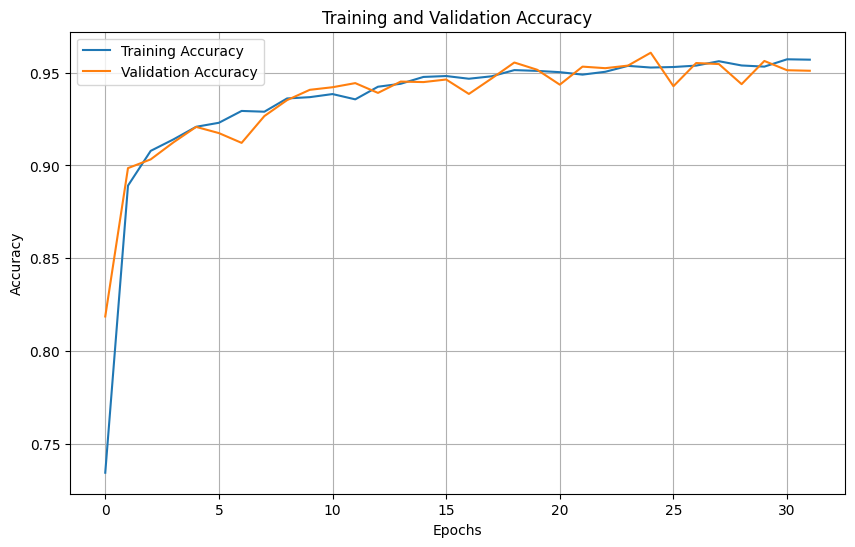

In [18]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()